# Práctica 4 – Pruebas Estadísticas (Anime Dataset)

En esta práctica realizaremos pruebas estadísticas para evaluar si:
- Existen diferencias significativas entre los tipos de anime (TV, Movie, OVA...) respecto a su **Rating**.
- Compararemos grupos para confirmar hipótesis usando:
  - ANOVA de un factor  
  - T-test (o prueba Mann-Whitney si no hay normalidad)  
  - Kruskal-Wallis  

Usando el dataset limpio **Anime_clean.csv**.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, ttest_ind, mannwhitneyu, kruskal

df = pd.read_csv("../data/Anime_clean.csv")
df.head()


,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Content_Warning,Related_Mange,Related_anime,Voice_actors,staff
0,1.0,Demon Slayer: Kimetsu no Yaiba - Entertainment...,Kimetsu no Yaiba: Yuukaku-hen,TV,24.0,ufotable,Fall,"Action, Adventure, Fantasy, Shounen, Demons, H...",4.60,2021.0,NaN,'Tanjiro and his friends accompany the Hashira...,Explicit Violence,Demon Slayer: Kimetsu no Yaiba,"Demon Slayer: Kimetsu no Yaiba, Demon Slayer: ...","Inosuke Hashibira : Yoshitsugu Matsuoka, Nezuk...","Koyoharu Gotouge : Original Creator, Haruo Sot..."
1,2.0,Fruits Basket the Final Season,Fruits Basket the Final,TV,13.0,TMS Entertainment,Spring,"Drama, Fantasy, Romance, Shoujo, Animal Transf...",4.60,2021.0,NaN,'The final arc of Fruits Basket.',"Emotional Abuse,, Mature Themes,, Physical Abu...","Fruits Basket, Fruits Basket Another","Fruits Basket 1st Season, Fruits Basket 2nd Se...","Akito Sohma : Maaya Sakamoto, Kyo Sohma : Yuum...","Natsuki Takaya : Original Creator, Yoshihide I..."
2,3.0,Mo Dao Zu Shi 3,The Founder of Diabolism 3,Web,12.0,B.C MAY PICTURES,NaN,"Fantasy, Ancient China, Chinese Animation, Cul...",4.58,2021.0,NaN,'The third season of Mo Dao Zu Shi.',NaN,Grandmaster of Demonic Cultivation: Mo Dao Zu ...,"Mo Dao Zu Shi 2, Mo Dao Zu Shi Q","Lan Wangji, Wei Wuxian, Jiang Cheng, Jin Guang...","Mo Xiang Tong Xiu : Original Creator, Xiong Ke..."
3,4.0,Fullmetal Alchemist: Brotherhood,Hagane no Renkinjutsushi: Full Metal Alchemist,TV,64.0,Bones,Spring,"Action, Adventure, Drama, Fantasy, Mystery, Sh...",4.58,2009.0,2010.0,"""The foundation of alchemy is based on the law...","Animal Abuse,, Mature Themes,, Violence,, Dome...","Fullmetal Alchemist, Fullmetal Alchemist (Ligh...","Fullmetal Alchemist: Brotherhood Specials, Ful...","Alphonse Elric : Rie Kugimiya, Edward Elric : ...","Hiromu Arakawa : Original Creator, Yasuhiro Ir..."
4,5.0,Attack on Titan 3rd Season: Part II,Shingeki no Kyojin Season 3: Part II,TV,10.0,WIT Studio,Spring,"Action, Fantasy, Horror, Shounen, Dark Fantasy...",4.57,2019.0,NaN,'The battle to retake Wall Maria begins now! W...,"Cannibalism,, Explicit Violence","Attack on Titan, Attack on Titan: End of the W...","Attack on Titan, Attack on Titan 2nd Season, A...","Armin Arlelt : Marina Inoue, Eren Jaeger : Yuu...","Hajime Isayama : Original Creator, Tetsurou Ar..."


In [2]:
df[["Type", "Rating"]].head()


,Type,Rating
0,TV,4.60
1,TV,4.60
2,Web,4.58
3,TV,4.58
4,TV,4.57


In [3]:
groups = df.groupby("Type")["Rating"].apply(list)
groups


Type
DVD S    [4.33, 4.29, 4.27, 4.26, 4.25, 4.24, 4.24, 4.2...
Movie    [4.54, 4.51, 4.51, 4.5, 4.46, 4.45, 4.44, 4.43...
Music    [4.36, 4.24, 4.19, 4.14, 4.13, 4.06, 4.03, 4.0...
OVA      [4.37, 4.37, 4.37, 4.36, 4.35, 4.3, 4.29, 4.28...
Other    [4.25, 4.21, 4.18, 4.16, 4.13, 4.12, 4.09, 4.0...
TV       [4.6, 4.6, 4.58, 4.57, 4.56, 4.56, 4.55, 4.53,...
TV Sp    [4.34, 4.32, 4.29, 4.29, 4.28, 4.26, 4.25, 4.1...
Web      [4.58, 4.5, 4.46, 4.46, 4.45, 4.44, 4.44, 4.42...
Name: Rating, dtype: object

In [4]:
anova_result = f_oneway(*groups)

anova_result


F_onewayResult(statistic=np.float64(144.25242615696737), pvalue=np.float64(6.577818954952985e-207))

In [5]:
alpha = 0.05

if anova_result.pvalue < alpha:
    print("✔ Existe diferencia significativa entre los tipos de anime (rechazamos H0).")
else:
    print("✖ No hay evidencia de diferencia entre tipos (no se rechaza H0).")

anova_result


✔ Existe diferencia significativa entre los tipos de anime (rechazamos H0).


F_onewayResult(statistic=np.float64(144.25242615696737), pvalue=np.float64(6.577818954952985e-207))

In [6]:
tv = df[df["Type"] == "TV"]["Rating"]
movie = df[df["Type"] == "Movie"]["Rating"]

tv.describe(), movie.describe()


(count    0.0
 mean     NaN
 std      NaN
 min      NaN
 25%      NaN
 50%      NaN
 75%      NaN
 max      NaN
 Name: Rating, dtype: float64,
 count    2549.000000
 mean        3.409588
 std         0.441315
 min         1.060000
 25%         3.170000
 50%         3.450000
 75%         3.680000
 max         4.540000
 Name: Rating, dtype: float64)

In [7]:
t_result = ttest_ind(tv, movie, equal_var=False)
t_result


C:\Users\hmisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\_lib\deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


TtestResult(statistic=np.float64(nan), pvalue=np.float64(nan), df=np.float64(nan))

In [8]:
mw_result = mannwhitneyu(tv, movie, alternative="two-sided")
mw_result


C:\Users\hmisa\AppData\Local\Temp\ipykernel_23652\454645135.py:1: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  mw_result = mannwhitneyu(tv, movie, alternative="two-sided")


MannwhitneyuResult(statistic=np.float64(nan), pvalue=np.float64(nan))

In [9]:
kr_result = kruskal(*groups)
kr_result


KruskalResult(statistic=np.float64(1210.2527072680089), pvalue=np.float64(4.283489328838269e-257))

In [10]:
if kr_result.pvalue < alpha:
    print("✔ Hay diferencias entre los grupos (Kruskal-Wallis).")
else:
    print("✖ No hay diferencias significativas entre los grupos.")


✔ Hay diferencias entre los grupos (Kruskal-Wallis).


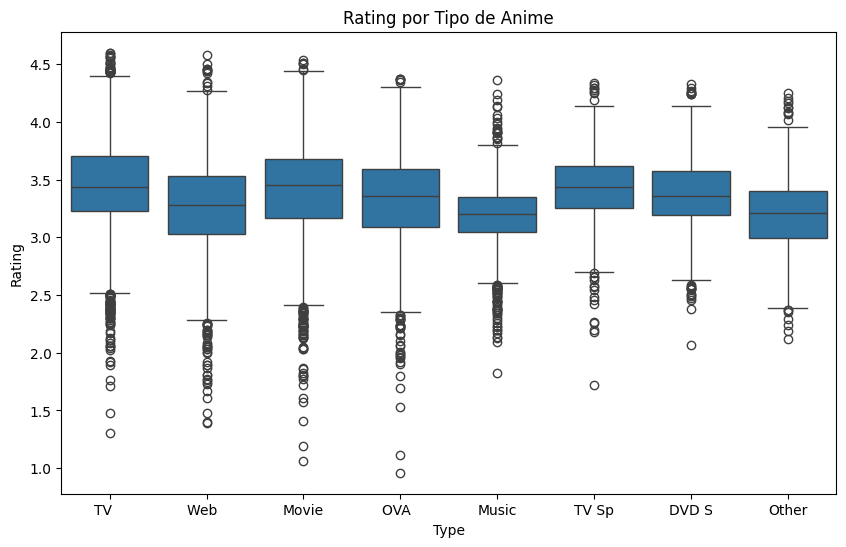

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Type", y="Rating", data=df)
plt.title("Rating por Tipo de Anime")
plt.show()


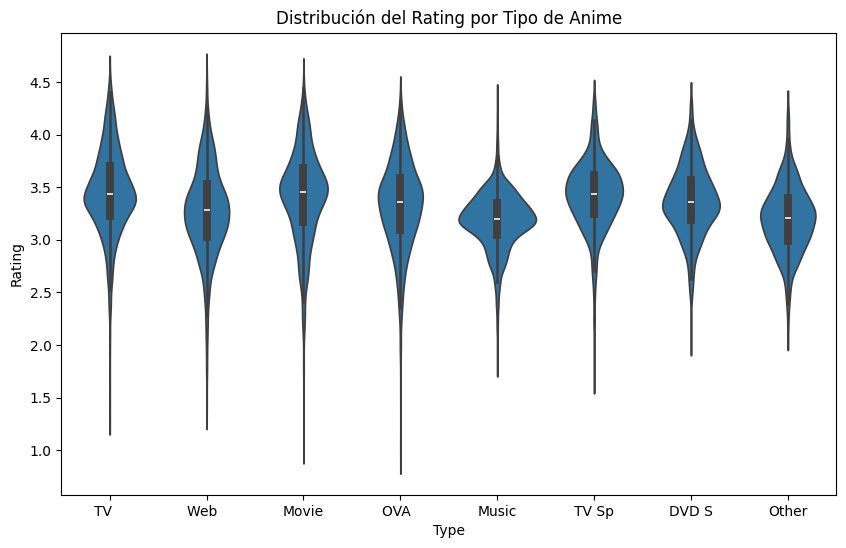

In [12]:
plt.figure(figsize=(10,6))
sns.violinplot(x="Type", y="Rating", data=df)
plt.title("Distribución del Rating por Tipo de Anime")
plt.show()
